In [1]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [2]:
import os

def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
    
image_path = "./datasets"
walk_through_dir(image_path)

There are 3 directories and 1 images in './datasets'.
There are 0 directories and 500 images in './datasets\test'.
There are 2 directories and 0 images in './datasets\train'.
There are 0 directories and 10000 images in './datasets\train\cat'.
There are 0 directories and 10000 images in './datasets\train\dog'.
There are 2 directories and 0 images in './datasets\val'.
There are 0 directories and 2500 images in './datasets\val\cat'.
There are 0 directories and 2500 images in './datasets\val\dog'.


## Directories where the train, validation, and test sets are located.

In [3]:
image_path = "./datasets"

train_dir = 'datasets/train'
val_dir = 'datasets/val'
test_dir = 'datasets/test'

In [4]:
from PIL import Image
from pathlib import Path
import glob

# get path to all training images
images_path_list = glob.glob(f"{train_dir}/*/*.jpg")
images_path_list[0]

'datasets/train\\cat\\cat.0.jpg'

In [5]:
# get the class of the image
image_class = Path(images_path_list[0]).parent.stem
image_class

'cat'

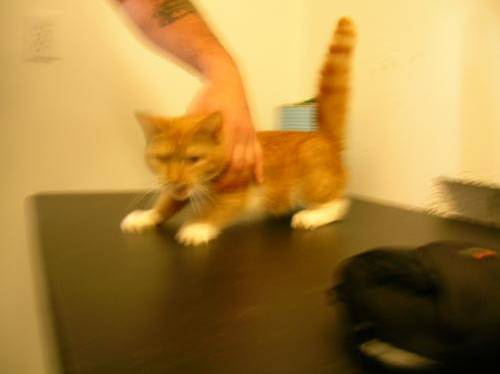

In [6]:
image = Image.open(images_path_list[0])
image

Text(0.5, 1.0, 'Class: cat\nShape: (374, 500, 3)')

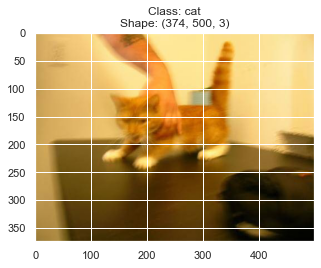

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# convert image into array
image_array = np.asarray(image)

# plot image
plt.figure(figsize=(5, 5))
plt.imshow(image_array)
plt.title(f"Class: {image_class}\nShape: {image_array.shape}")

## Transforming the Data
We resize each image into 128 by 128 pixels so that it can fit into the input of the CNN model (which we will design to take in tensors that is of size (128, 128, 3).

a tensor is a 3D array, like how a matrix is a 2D array.

so this tensor is made up 3 matrices that are 128x128 each.

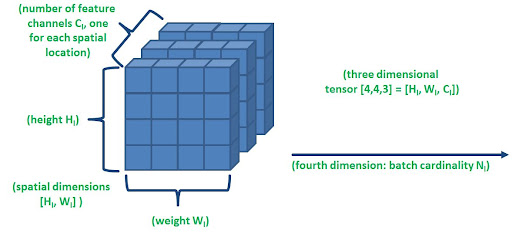

to use the image above as an illustration, each 4x4 square/plane/face is a 2D array (aka matrix), the whole thing is the tensor (3D array).

then we do a horizontal flip on random images in our dataset (probability of it flipping = 50%), then convert the each data point into a tensor.

In [8]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

size = (128, 128)

transform = transforms.Compose([
    transforms.Resize(size=size),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

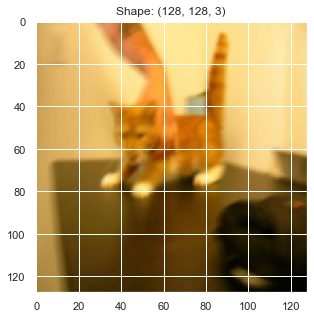

In [9]:
transformed_image = transform(image)

transformed_image_array = transformed_image.permute(1, 2, 0).numpy()

plt.figure(figsize=(5, 5))
plt.imshow(transformed_image_array)
plt.title(f"Shape: {transformed_image_array.shape}")
plt.show()

see how the shape is now 128x128x3?

In [10]:
from torchvision import datasets

# training data
train_data = datasets.ImageFolder(
    root=train_dir,
    transform=transform
)

# validation data
val_data = datasets.ImageFolder(
    root=val_dir,
    transform=transform
)

#### `train_data` will be our training dataset. the information below shows that there are 20000 datapoints (images) in the train folder, and that they have all been transformed into tensors of our choosing just now. similarly, 5000 images in the validation folder with similar transformations

In [11]:
train_data, val_data

(Dataset ImageFolder
     Number of datapoints: 20000
     Root location: datasets/train
     StandardTransform
 Transform: Compose(
                Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 5000
     Root location: datasets/val
     StandardTransform
 Transform: Compose(
                Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

#### the classes in our training dataset. this is just taking the values/names of the folders inside the training dataset.

In [14]:
print("Classes: ", train_data.classes)
print("Classes as IDs: ", train_data.class_to_idx)
print("Length of training data: ", len(train_data))
print("Length of validation data: ", len(val_data))

Classes:  ['cat', 'dog']
Classes as IDs:  {'cat': 0, 'dog': 1}
Length of training data:  20000
Length of validation data:  5000


#### remember how we said that each image is now a tensor? let's visualise that.

In [16]:
# taking the first image as an example
print(f"Image as a tensor: \n{train_data[0][0]}")
print(f"Image's shape: {train_data[0][0].shape}")

Image as a tensor: 
tensor([[[0.8000, 0.8196, 0.8275,  ..., 0.9647, 0.9608, 0.9451],
         [0.8000, 0.8196, 0.8275,  ..., 0.9647, 0.9608, 0.9490],
         [0.8000, 0.8196, 0.8275,  ..., 0.9686, 0.9608, 0.9529],
         ...,
         [0.6196, 0.6235, 0.6314,  ..., 0.0118, 0.0118, 0.0078],
         [0.6078, 0.6118, 0.6196,  ..., 0.0078, 0.0078, 0.0078],
         [0.5961, 0.6039, 0.6157,  ..., 0.0078, 0.0078, 0.0078]],

        [[0.6471, 0.6667, 0.6745,  ..., 0.8118, 0.8000, 0.7882],
         [0.6471, 0.6667, 0.6745,  ..., 0.8196, 0.8039, 0.7922],
         [0.6471, 0.6667, 0.6745,  ..., 0.8235, 0.8118, 0.8000],
         ...,
         [0.4863, 0.4941, 0.4980,  ..., 0.0157, 0.0157, 0.0078],
         [0.4863, 0.4902, 0.4980,  ..., 0.0078, 0.0078, 0.0078],
         [0.4745, 0.4824, 0.4941,  ..., 0.0078, 0.0078, 0.0078]],

        [[0.3451, 0.3647, 0.3725,  ..., 0.4902, 0.4784, 0.4784],
         [0.3451, 0.3647, 0.3725,  ..., 0.5020, 0.4863, 0.4824],
         [0.3451, 0.3647, 0.3725,  ...

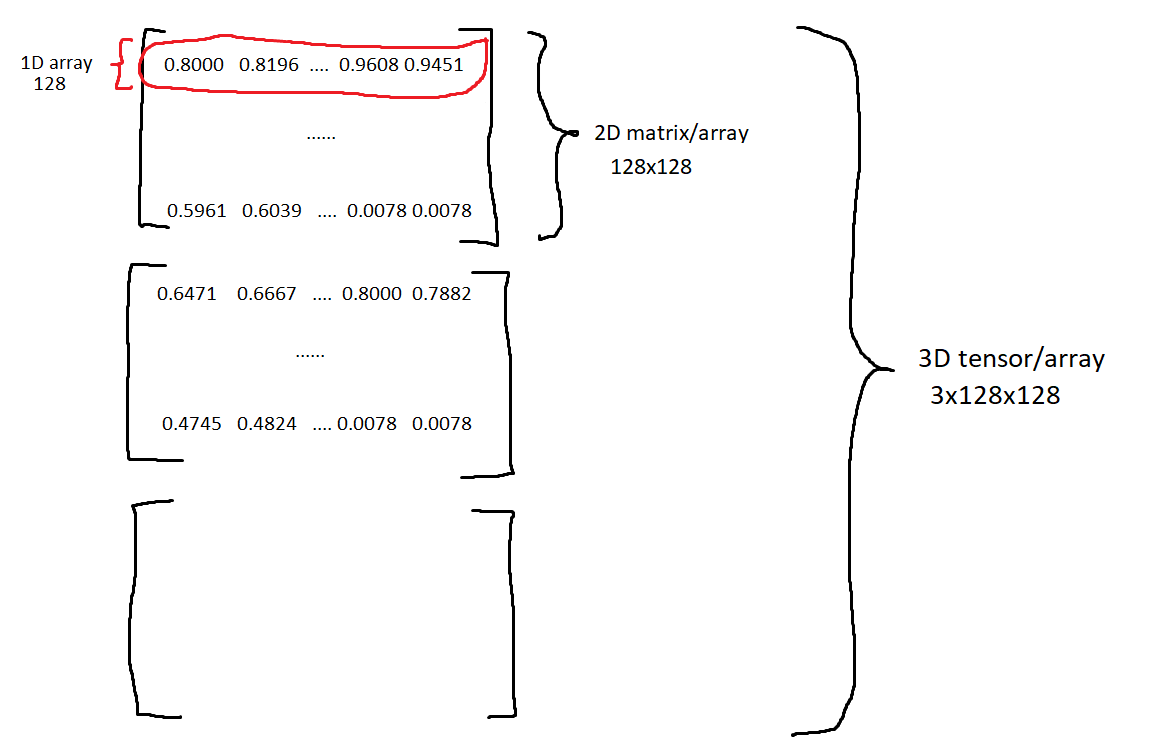

In [21]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32)

train_loader, val_loader

(<torch.utils.data.dataloader.DataLoader at 0x29cf97d7f70>,
 <torch.utils.data.dataloader.DataLoader at 0x29cf97d7af0>)

#### apparently batch size matters when constructing CNN. we try with 32 first, then maybe try with 1.

## Constructing the CNN

In [22]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        # ReLU, MaxPool, and dropout
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(
            kernel_size=2,
            stride=2
        )
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(
            in_channels=3, 
            out_channels=32, 
            kernel_size=5, 
            stride=1,
            padding=2
        )
        self.bn1 = nn.BatchNorm2d(32)
        
        self.conv2 = nn.Conv2d(32, 64, 5, 1, 2)
        self.bn2 = nn.BatchNorm2d(64)
        
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.bn3 = nn.BatchNorm2d(128)
        
        # fully connected layers
        self.fc1 = nn.Linear(128 * 16 * 16, 256)
        self.fc2 = nn.Linear(256, 2)
        
    def forward(self, x):
        # 128x128 -> 64x64
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        # 64x64 -> 32x32
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        # 32x32 -> 16x16
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        
        return x

## Training the model

In [23]:
# Instantiate the model
model = CNN().to(device)

# Cross Entropy Loss
criterion = nn.CrossEntropyLoss()

# Adam Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

import time
from datetime import timedelta
from tqdm import tqdm

num_epochs = 20

total_start_time = time.time()

# for record keeping purposes to plot graph later on
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    epoch_start_time = time.time()
    
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in tqdm(train_loader, desc=f"Training Epoch {epoch+1}/{num_epochs}"):
        images = images.to(device)
        labels = labels.to(device)

        # 1. zero gradient of the optimizer
        optimizer.zero_grad()

        # 2. model outputs
        outputs = model(images)
        
        # 3. let the loss function calculate loss
        loss = criterion(outputs, labels)
        
        # 4. loss backward
        loss.backward()
        
        # 5. optimizer step
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = 100 * correct / total

    # Validation
    model.eval() # Set model to evaluation mode
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss = val_running_loss / len(val_loader.dataset)
    val_acc = 100 * val_correct / val_total
    
    # add to record keeping purposes
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    
    scheduler.step()

    epoch_end_time = time.time()
    epoch_duration = epoch_end_time - epoch_start_time
    epoch_duration_formatted = str(timedelta(seconds=int(epoch_duration)))

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%, "
          f"Time: {epoch_duration_formatted}")

total_end_time = time.time()
total_training_time = total_end_time - total_start_time
total_training_time_formatted = str(timedelta(seconds=int(total_training_time)))
print(f"Total Training Time: {total_training_time_formatted}")

Training Epoch 1/20: 100%|███████████████████████████████████████████████████████████| 625/625 [02:39<00:00,  3.92it/s]


Epoch [1/20], Train Loss: 0.5529, Train Acc: 71.73%, Val Loss: 0.4909, Val Acc: 76.20%, Time: 0:03:16


Training Epoch 2/20: 100%|███████████████████████████████████████████████████████████| 625/625 [01:16<00:00,  8.14it/s]


Epoch [2/20], Train Loss: 0.4426, Train Acc: 79.28%, Val Loss: 0.4278, Val Acc: 79.80%, Time: 0:01:33


Training Epoch 3/20: 100%|███████████████████████████████████████████████████████████| 625/625 [01:19<00:00,  7.88it/s]


Epoch [3/20], Train Loss: 0.3952, Train Acc: 82.10%, Val Loss: 0.4202, Val Acc: 79.34%, Time: 0:01:35


Training Epoch 4/20: 100%|███████████████████████████████████████████████████████████| 625/625 [01:17<00:00,  8.07it/s]


Epoch [4/20], Train Loss: 0.3634, Train Acc: 83.81%, Val Loss: 0.3893, Val Acc: 82.48%, Time: 0:01:33


Training Epoch 5/20: 100%|███████████████████████████████████████████████████████████| 625/625 [01:17<00:00,  8.07it/s]


Epoch [5/20], Train Loss: 0.3319, Train Acc: 85.48%, Val Loss: 0.3612, Val Acc: 84.32%, Time: 0:01:33


Training Epoch 6/20: 100%|███████████████████████████████████████████████████████████| 625/625 [01:17<00:00,  8.09it/s]


Epoch [6/20], Train Loss: 0.2747, Train Acc: 88.43%, Val Loss: 0.3321, Val Acc: 85.20%, Time: 0:01:33


Training Epoch 7/20: 100%|███████████████████████████████████████████████████████████| 625/625 [01:17<00:00,  8.09it/s]


Epoch [7/20], Train Loss: 0.2644, Train Acc: 88.89%, Val Loss: 0.3293, Val Acc: 85.70%, Time: 0:01:33


Training Epoch 8/20: 100%|███████████████████████████████████████████████████████████| 625/625 [01:16<00:00,  8.13it/s]


Epoch [8/20], Train Loss: 0.2549, Train Acc: 89.29%, Val Loss: 0.3224, Val Acc: 85.62%, Time: 0:01:33


Training Epoch 9/20: 100%|███████████████████████████████████████████████████████████| 625/625 [01:15<00:00,  8.23it/s]


Epoch [9/20], Train Loss: 0.2490, Train Acc: 89.53%, Val Loss: 0.3197, Val Acc: 85.76%, Time: 0:01:32


Training Epoch 10/20: 100%|██████████████████████████████████████████████████████████| 625/625 [01:17<00:00,  8.11it/s]


Epoch [10/20], Train Loss: 0.2455, Train Acc: 89.75%, Val Loss: 0.3168, Val Acc: 86.26%, Time: 0:01:32


Training Epoch 11/20: 100%|██████████████████████████████████████████████████████████| 625/625 [01:16<00:00,  8.21it/s]


Epoch [11/20], Train Loss: 0.2338, Train Acc: 90.39%, Val Loss: 0.3112, Val Acc: 86.26%, Time: 0:01:32


Training Epoch 12/20: 100%|██████████████████████████████████████████████████████████| 625/625 [01:16<00:00,  8.22it/s]


Epoch [12/20], Train Loss: 0.2339, Train Acc: 90.35%, Val Loss: 0.3129, Val Acc: 86.16%, Time: 0:01:31


Training Epoch 13/20: 100%|██████████████████████████████████████████████████████████| 625/625 [01:18<00:00,  7.99it/s]


Epoch [13/20], Train Loss: 0.2329, Train Acc: 90.49%, Val Loss: 0.3145, Val Acc: 86.24%, Time: 0:01:34


Training Epoch 14/20: 100%|██████████████████████████████████████████████████████████| 625/625 [01:18<00:00,  7.97it/s]


Epoch [14/20], Train Loss: 0.2320, Train Acc: 90.45%, Val Loss: 0.3106, Val Acc: 86.42%, Time: 0:01:33


Training Epoch 15/20: 100%|██████████████████████████████████████████████████████████| 625/625 [01:17<00:00,  8.04it/s]


Epoch [15/20], Train Loss: 0.2342, Train Acc: 90.27%, Val Loss: 0.3128, Val Acc: 86.38%, Time: 0:01:32


Training Epoch 16/20: 100%|██████████████████████████████████████████████████████████| 625/625 [01:18<00:00,  8.01it/s]


Epoch [16/20], Train Loss: 0.2280, Train Acc: 90.66%, Val Loss: 0.3108, Val Acc: 86.26%, Time: 0:01:33


Training Epoch 17/20: 100%|██████████████████████████████████████████████████████████| 625/625 [01:17<00:00,  8.01it/s]


Epoch [17/20], Train Loss: 0.2286, Train Acc: 90.56%, Val Loss: 0.3126, Val Acc: 86.46%, Time: 0:01:33


Training Epoch 18/20: 100%|██████████████████████████████████████████████████████████| 625/625 [01:17<00:00,  8.10it/s]


Epoch [18/20], Train Loss: 0.2301, Train Acc: 90.64%, Val Loss: 0.3112, Val Acc: 86.54%, Time: 0:01:32


Training Epoch 19/20: 100%|██████████████████████████████████████████████████████████| 625/625 [01:17<00:00,  8.12it/s]


Epoch [19/20], Train Loss: 0.2306, Train Acc: 90.53%, Val Loss: 0.3083, Val Acc: 86.54%, Time: 0:01:32


Training Epoch 20/20: 100%|██████████████████████████████████████████████████████████| 625/625 [01:18<00:00,  7.92it/s]


Epoch [20/20], Train Loss: 0.2296, Train Acc: 90.47%, Val Loss: 0.3133, Val Acc: 86.16%, Time: 0:01:33
Total Training Time: 0:32:46


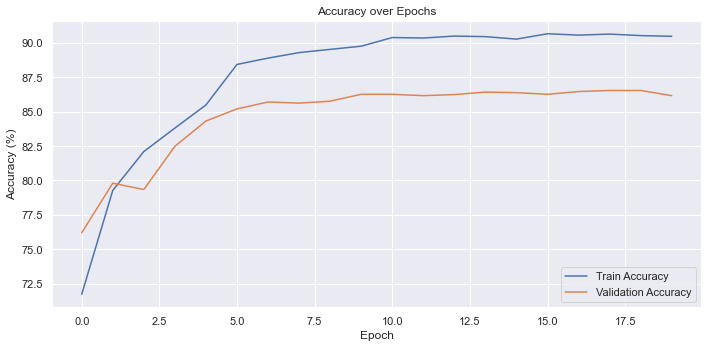

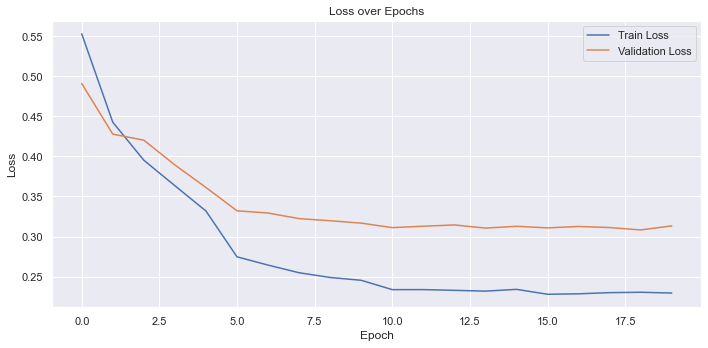

In [24]:
# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy over Epochs')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
class_names = train_data.classes

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
print(cm)
print(classification_report(y_true, y_pred, target_names=class_names))

[[2198  302]
 [ 375 2125]]
              precision    recall  f1-score   support

         cat       0.85      0.88      0.87      2500
         dog       0.88      0.85      0.86      2500

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



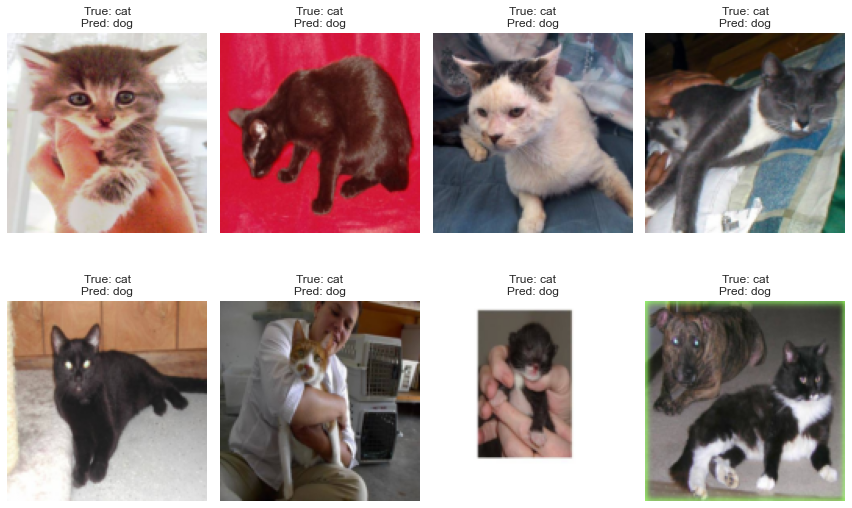

In [30]:
misclassified_images = []
misclassified_labels = []
misclassified_preds = []

model.eval()

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Identify misclassified images
        incorrect = (predicted != labels)
        if incorrect.any():
            # Collect misclassified images and labels
            misclassified_images.extend(images[incorrect].cpu())
            misclassified_labels.extend(labels[incorrect].cpu())
            misclassified_preds.extend(predicted[incorrect].cpu())
            

# Plot a few misclassified images
num_images = 8  # Number of images to display
plt.figure(figsize=(12, 8))
for idx in range(num_images):
    if idx >= len(misclassified_images):
        break
    img = misclassified_images[idx]
    true_label = misclassified_labels[idx].item()
    pred_label = misclassified_preds[idx].item()

    plt.subplot(2, 4, idx+1)
    img = img.numpy().transpose((1, 2, 0))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}")
plt.tight_layout()
plt.show()